In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pyextremes import EVA

print("Todos los paquetes importados correctamente")


Todos los paquetes importados correctamente


In [2]:
station = 1330
# We create some random continuous time series with some extremes
flowdata = pd.read_csv(f"../../../Status_Outlook_Bulletin/stations/data/{station}.csv",parse_dates=['Fecha'],index_col="Fecha",dayfirst=True,na_values="NA")
# Convertir el índice a datetime por si acaso
flowdata.index = pd.to_datetime(flowdata.index, dayfirst=True)
diff = pd.date_range(start = flowdata.index[0].strftime('%Y-%m-%d'), end = flowdata.index[-1].strftime('%Y-%m-%d'),freq='D')
# Re-index the dataframe based on the missind date variable
flowdata = flowdata.reindex(diff,fill_value=None)
# Set index Fecha
flowdata.index.name = 'Fecha'
flowdata = flowdata.rename_axis("date")
# Change columns names
flowdata.columns = ['flow']

#month and year column
flowdata['month'] = flowdata.index.month
flowdata['year'] = flowdata.index.year
flowdata = flowdata.reset_index()

#check whether or not there is enough data? 
print(station)
print(f"There are {flowdata['year'].max() - flowdata['year'].min()} years of data in this file.")
print(f"There are {sum(flowdata['flow'].isnull())} missing data points, which is {np.round(sum(flowdata['flow'].isnull())/len(flowdata) * 100,2)}% of the total data")

1330
There are 45 years of data in this file.
There are 1427 missing data points, which is 8.63% of the total data


In [3]:
flowdata.set_index('date', inplace=True)
# Create a time series (removing missing values in 'flow' column)
flowdata_ts = flowdata['flow'].dropna()
# Display the result
print(flowdata_ts)

date
1980-01-01    1.956
1980-01-02    1.956
1980-01-03    1.956
1980-01-04    1.956
1980-01-05    1.956
              ...  
2025-03-27    3.492
2025-03-28    3.848
2025-03-29    3.884
2025-03-30    2.952
2025-03-31    2.656
Name: flow, Length: 15100, dtype: float64


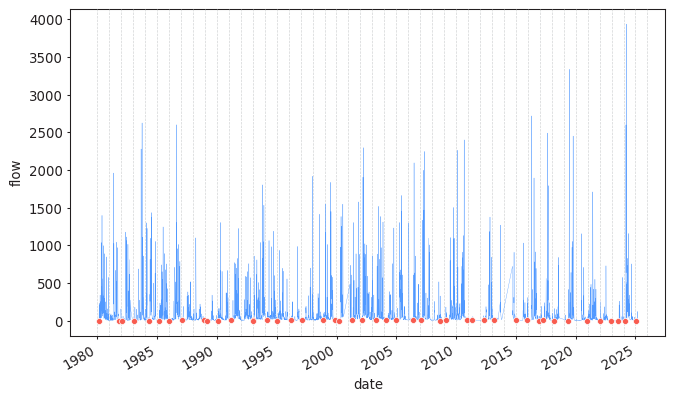

In [4]:
from pyextremes import get_extremes
from pyextremes.plotting import plot_extremes

extremes = get_extremes(
    ts=flowdata_ts,
    method="BM",
    extremes_type="low",
)
plot_extremes(
    ts=flowdata_ts,
    extremes=extremes,
    extremes_method="BM",
    extremes_type="high",
    block_size="365.2425D",
);

In [11]:
extremes.sort_values().head(6)

date
2023-07-29    0.248
1980-02-13    0.666
1981-10-30    1.186
1982-01-21    1.186
2019-05-19    1.395
2020-12-25    1.397
Name: flow, dtype: float64

In [5]:
model = EVA(flowdata_ts)

In [6]:
model.get_extremes(
    method="BM",
    extremes_type="low",
)

In [7]:
model.fit_model()
summary = model.get_summary(
    return_period=[2, 5, 10, 25, 50, 100, 250, 500, 1000],
    alpha=0.95,
    n_samples=1000,
)
print(summary)

               return value  lower ci  upper ci
return period                                  
2.0                3.745825  4.485493  2.982802
5.0                1.850529  2.508728  1.353723
10.0               1.184203  1.863624  0.833201
25.0               0.699941  1.471622  0.469267
50.0               0.492848  1.333958  0.315341
100.0              0.363268  1.250883  0.139668
250.0              0.262438  1.199247 -0.044871
500.0              0.217963  1.190838 -0.150467
1000.0             0.189817  1.188345 -0.231006


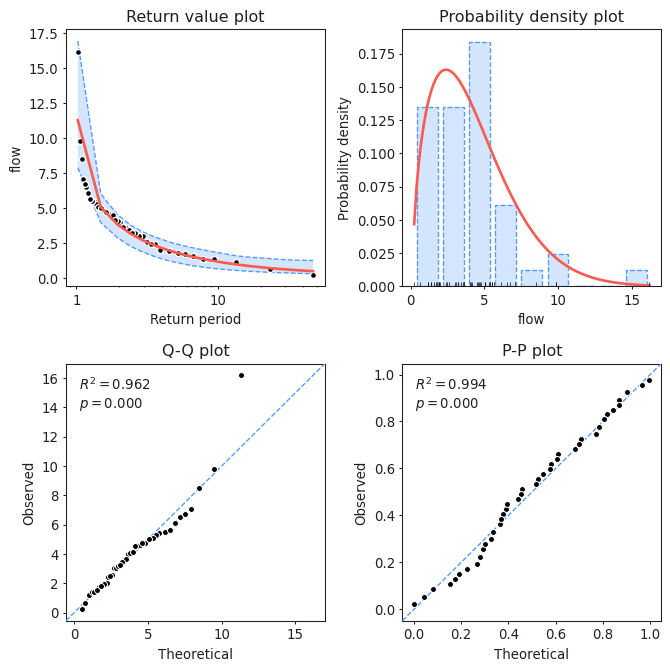

In [8]:
model.plot_diagnostic(alpha=0.95);
plt.show()